In [ ]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import  Model

Fashion MNIST 28 x 28 grayscale images of different types of clothings like shirts, t shirts, pants, etc.

Task: Classification.

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [ ]:
(x_train, y_train) , (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
# Standardization, apply scaling
x_train, x_test = x_train /255.0, x_test/255.0

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

x_train.shape is N x H x Warning
CNN requires a shape N x H x W x C.

Therefore we need to add a superfluous layers.

In [ ]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
x_test.shape

(10000, 28, 28, 1)

In [ ]:
# Number of classes
K = len(set(y_train))
print("number of classes:",K)

number of classes: 10


We will be using the Functional API.

Why?

a. Code looks cleaner and compact

b. It allows us to create branches.

c. It allows you to define model that can have multiple inputs and outputs.

In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
x_train[0].shape

(28, 28, 1)

In [ ]:
# Build the model using functional API

i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
# Dense layers NN design commences here
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x) # Output layer

# Once we have the variable representing the input "i"
# and the variable representing the output "x",
# we can pass these into the Model() constructor

model = Model(i,x)

In [ ]:
# Compile and fit
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 27s 14ms/step - loss: 0.5229 - accuracy: 0.8055 - val_loss: 0.4021 - val_accuracy: 0.8527
Epoch 2/15
1875/1875 [==============================] - 27s 14ms/step - loss: 0.3654 - accuracy: 0.8630 - val_loss: 0.3416 - val_accuracy: 0.8723
Epoch 3/15
1875/1875 [==============================] - 27s 14ms/step - loss: 0.3114 - accuracy: 0.8840 - val_loss: 0.3323 - val_accuracy: 0.8767
Epoch 4/15
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2779 - accuracy: 0.8958 - val_loss: 0.2968 - val_accuracy: 0.8917
Epoch 5/15
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2518 - accuracy: 0.9057 - val_loss: 0.2911 - val_accuracy: 0.8952
Epoch 6/15
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2293 - accuracy: 0.9130 - val_loss: 0.3126 - val_accuracy: 0.8889
Epoch 7/15
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2118 - accuracy: 0.9185 - val_loss: 0.2945 -

Observation:  We are getting a decent accuracy.

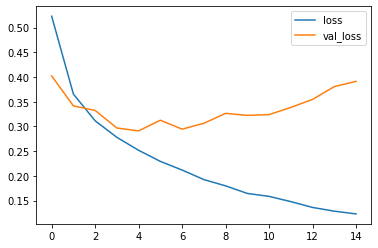

In [ ]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

Observation: It appears that the model is Overfitting a little bit since we see that the validation loss is slightly going up.

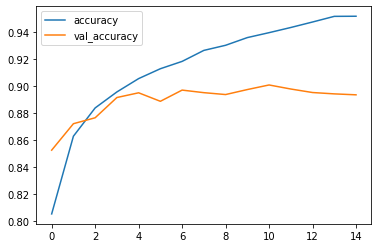

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

Observation: It appears that the validation accuracy stays standard but at the same time, the validation loss increases. It means that our model is becoming more and more confident in its incorrect predictions.

Confusion matrix, without normalization
[[895   2  23  22   0   1  46   0  11   0]
 [  6 973   1  13   4   0   1   0   2   0]
 [ 20   0 893  11  32   0  39   0   5   0]
 [ 25   4  24 902  25   1  16   0   3   0]
 [  3   0 107  33 801   1  52   0   3   0]
 [  1   0   0   1   0 963   0  19   0  16]
 [167   0  90  28  89   1 614   0  11   0]
 [  0   0   0   0   0   9   0 963   0  28]
 [  6   1   7   1   1   3   3   4 974   0]
 [  0   0   1   0   0   6   0  34   0 959]]


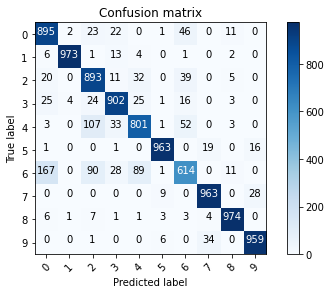

In [ ]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))



In [ ]:
# label mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")
labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

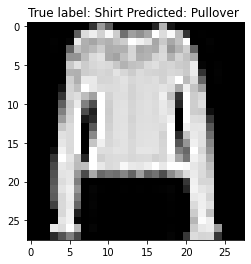

In [ ]:
# Show the misclassified examples
misclassified_img = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_img)
plt.imshow(x_test[i].reshape(28,28), cmap = 'gray')
plt.title("True label: %s Predicted: %s " %(labels[y_test[i]], labels[p_test[i]]));

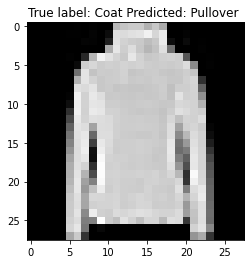

In [ ]:
# Show the misclassified examples
misclassified_img = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_img)
plt.imshow(x_test[i].reshape(28,28), cmap = 'gray')
plt.title("True label: %s Predicted: %s " %(labels[y_test[i]], labels[p_test[i]]));